#Intorduction

The iris.csv file compasses data about flowers and classify them into 3 classes


*   Iris-setosa
*   Iris-virginica
*   Iris-versicolor

Our goals is given information about a flower we should predict its class.

## Import Statements

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from sklearn import model_selection

## Loading Data

Try to read the file 'iris.csv' using **Pandas**.

💡 **Hint**: read more about how to read files using **Pandas** [here](https://www.w3schools.com/python/pandas/pandas_csv.asp).

In [41]:
df = pd.read_csv('iris.csv')

Print out the data and look at it :D.

💡**Hint**: look up [this](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) to see how can you print data frames.

In [42]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Preprocessing (**Optinal**)

**Data preprocessing:** is an important step in machine learning, it is the process of generating raw data for your models.

Remember that machines understand numbers only so to them 'Iris-setosa' doesnt mean anything.

💡**Hint:**Try to **Encode** the classes into numbers? this [link](https://www.geeksforgeeks.org/how-to-convert-categorical-string-data-into-numeric-in-python/) can be helpful

In [43]:
df.loc[df.species == 'Iris-setosa', 'species'] = 0
df.loc[df.species == 'Iris-virginica', 'species'] = 1
df.loc[df.species == 'Iris-versicolor', 'species'] = 2

## Data Splitting

First lets extract the Ys (classes) and the X (samples).

💡**Hints**: read more about dropping columns [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html).

In [44]:
x = df.drop('species', axis = 1)
y = df.species

Now let's split our data to train and test using **model_selection.train_test_split** method.

💡**hint**: read more about the method [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [45]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x,y,test_size=0.2, shuffle = True)

Now lets transform these data frames into numpy arrays

💡 **Hint**: read more about converting dfs to numpy arrays [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_numpy.html).

In [46]:
X_train = X_train.to_numpy(dtype = 'float32')
X_test = X_test.to_numpy(dtype = 'float32')
Y_train = Y_train.to_numpy(dtype = 'int64')
Y_test = Y_test.to_numpy(dtype = 'int64')

## Model Training

To train our model we are going to use **Pytroch** library. but remember our data **X and Y** is a numpy object while pytorch works with pytorch tensors.

💡 **hint**: torch has a method to convert numpy arrays into tensors. this [link](https://www.tutorialspoint.com/how-to-convert-a-numpy-ndarray-to-a-pytorch-tensor-and-vice-versa) may be helpful.

In [47]:
X_train = torch.from_numpy(X_train)
X_test = torch.from_numpy(X_test)
Y_train = torch.from_numpy(Y_train)
Y_test = torch.from_numpy(Y_test)

We are trying to to build a network.
the suggested archeticture is


*   One Linear layer (n, 5) # what is n?
*   Activation function (sigmoid)
*   Another Linear layer (m, 5) # what does m represents?
*   Activation function (sigmoid)
*   One Linear layer (z, o) # what does z and o represents?

Then define your optimizer and cost function using pytorch

follow these links for 💡 **hints**:

[Defining optimizers in pytorch](https://pytorch.org/tutorials/beginner/basics/optimization_tutorial.html#optimizer)

[Cross entopy loss in pytorch](https://neptune.ai/blog/pytorch-loss-functions)


In [48]:
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 5),
    nn.Sigmoid(),
    nn.Linear(5, 5),
    nn.Sigmoid(),
    nn.Linear(5, 3)
)

optimizer = optim.SGD(model.parameters(), lr = 1e-2) # lr = 0.001
critirion = nn.CrossEntropyLoss()

Now that we defined our optimizer, loss function and model lets create a loop to train the model.

Remember to create a list to store the loss of each iteration.

Use the model to predict data.

Compute the loss for the predicted data.

What else should you do?

💡 **Hint:** read [this](https://machinelearningmastery.com/creating-a-training-loop-for-pytorch-models/) to understand how training loops work.

In [60]:
ls = []

for i in range(3000):
  a = model(X_train)

  loss = critirion(a, Y_train)
  loss.backward()

  optimizer.step()
  optimizer.zero_grad()

  ls.append(loss.item())

Now let's plot our loss.


💡**Hint:** need a refresher on how to plot using matplot library? try [this](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html).

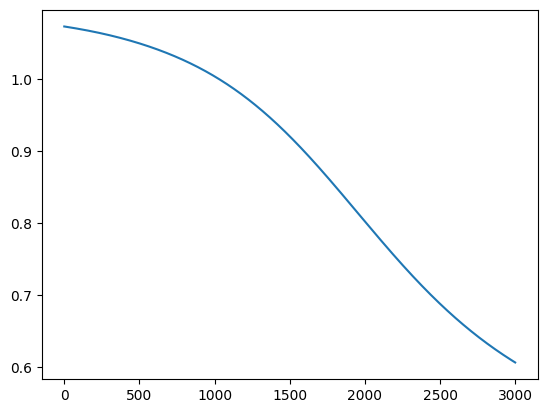

In [61]:
plt.plot(ls)

# Assessing Model Accuracy

how about we assess our model?

get the y_hat and extract the predicted class using softmax.


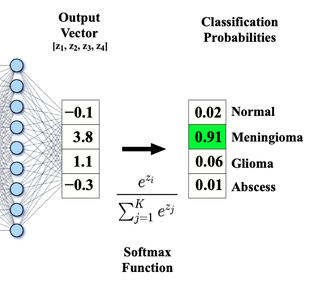

Remeber how to use arg max in pytorch and its importance

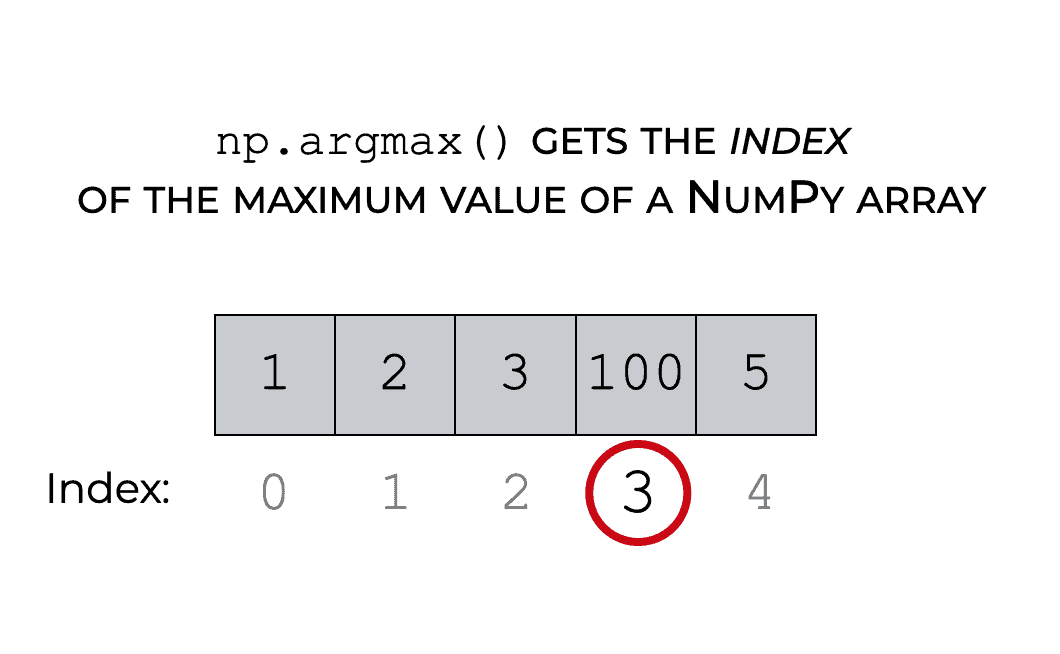
Then try to calculate the accuracy.

💡 **Hints:**


*   [What's softmax?](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)
*   accuracy = number of corrent predictions/all predictions


In [62]:
y_hat = nn.functional.softmax(model(X_train), dim=1)
pred = torch.argmax(y_hat, dim=1)
accuracy = torch.sum(pred == Y_train) / pred.shape[0]

In [63]:
accuracy.item() * 100

69.9999988079071

Feed your model the test data and see how it performs.

In [64]:
y_test = model(X_test)
y_hat_test= nn.functional.softmax(model(X_test), dim=1)
y_test_pred = torch.argmax(y_hat_test, dim=1)
accuracy = torch.sum(y_test_pred == Y_test) / y_test_pred.shape[0]

In [65]:
accuracy.item() * 100

60.00000238418579

## Confusion Matrix

Do you remember confusion matrix?

try to implement it here.

💡**Hint:** see [this](hhttps://www.w3schools.com/python/python_ml_confusion_matrix.asp) for more info about implementing confusion matrix.